# Task 2

---

## Predictive modeling of customer bookings

- EDA: Learn the complete process of EDA
- Data Visualization: Visualising the data to get better insight from it.
- Feature Engineering: 
- Build Machine learning models: Learn to make a Machine learning model after the data preprocessing steps.
- Comparing the models: We will be working on multiple models so that we could choose the best one for that we need to know the techniques of how to compare our model to choose the best one so we will be covering that also.


### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
#import the necessary libraries 
import pandas as pd #data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data plot
%matplotlib inline 
import seaborn as sns #data plot
import warnings
warnings.filterwarnings("ignore") #ignore warning


In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
#check the shape Of the dataset
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

Our purpose of this project is to predict if a customer complete their booking or not. User who complete his/her booking is labeled as 1. User who doesn’t complete booking is labeled as 0, *booking_complete* variable is our target. 

In [5]:
# Duplicate values
df[df.duplicated()].head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0


Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.

In [6]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df.shape #check the shape of dataset again. 

(49281, 14)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Data Visualization

#### Univariate Analysis

<AxesSubplot:xlabel='booking_complete', ylabel='count'>

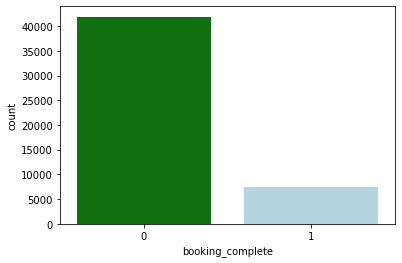

In [10]:
sns.countplot(x = 'booking_complete', data = df, palette=['green', 'lightblue'])

In [11]:
target_count = df['booking_complete'].value_counts()

Text(0.5, 1.0, 'Distribution of target variable')

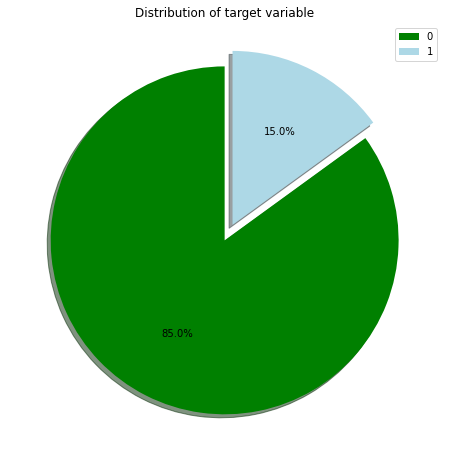

In [12]:
fig, ax = plt.subplots(figsize = (16, 8))
explode=(0,0.1)
colors = ('green', 'lightblue')

ax.pie(target_count, autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, explode = explode)
ax.legend(target_count.keys().tolist())

ax.set_title('Distribution of target variable')



Taking a look at the countplot, we get an understanding that most of the target variable in the dataset is failure. More than 85% customers did not complete their booking. Therefore, we are dealing with an imbalanced dataset. 

#### Univariate Analysis for categorical variables

Because these variables "wants_extra_baggage", "wants_preferred_seat","wants_in_flight_meals"  are Yes No question and have been converted to numeric and also "num_passengers" and "flight_duration" with a few of values, so for visualization, I still keep them in categorical features. 

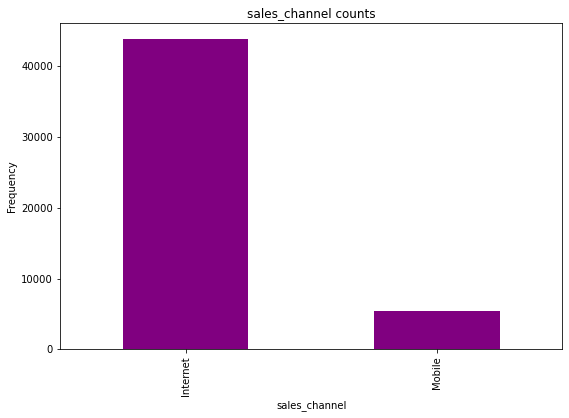

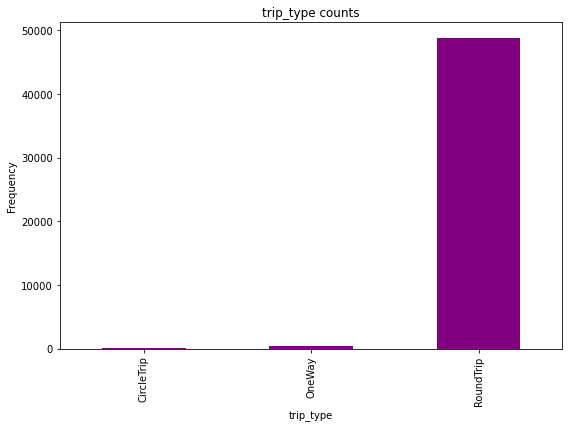

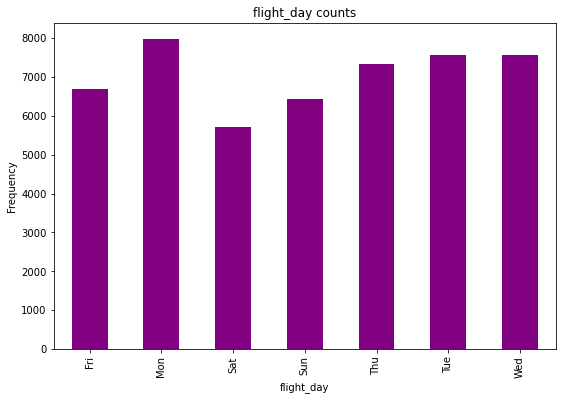

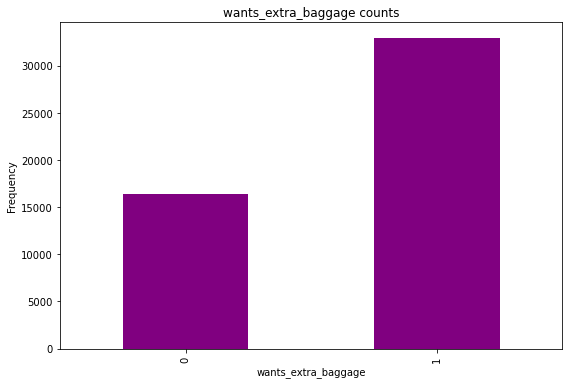

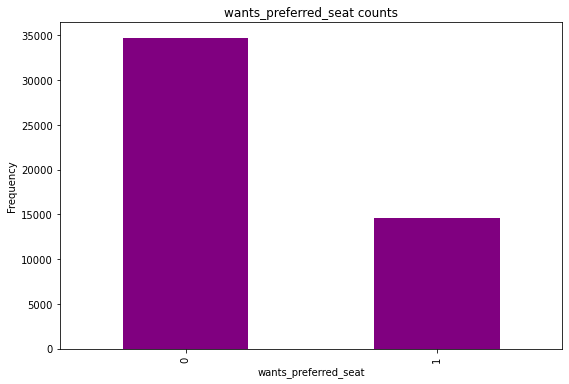

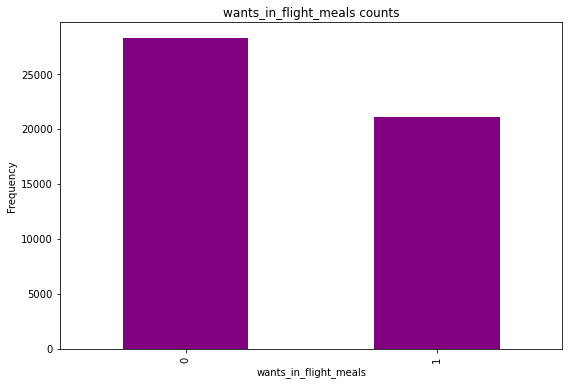

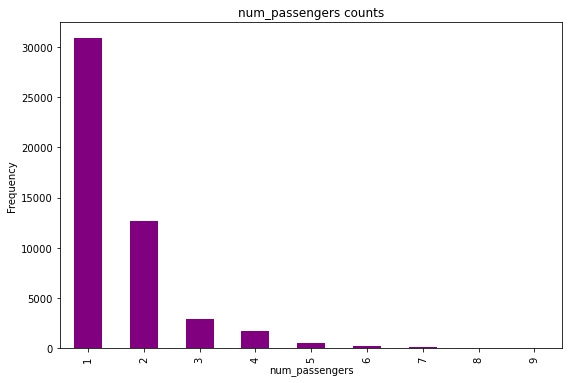

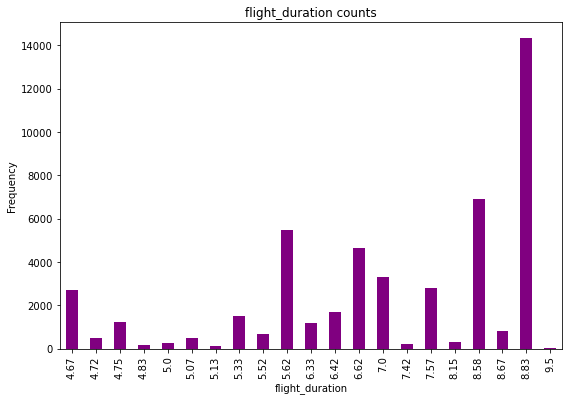

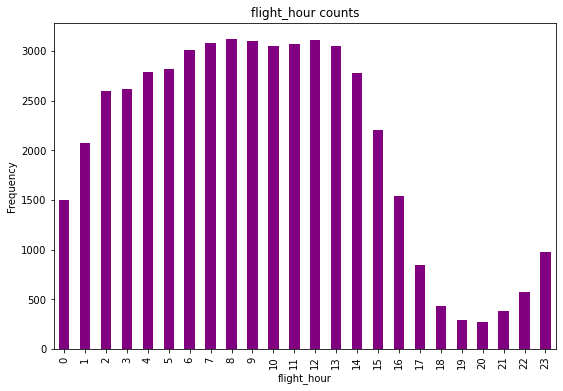

In [20]:
categorical_features = df[["sales_channel", "trip_type", "flight_day",
                        "wants_extra_baggage", "wants_preferred_seat","wants_in_flight_meals", 
                           "num_passengers","flight_duration", "flight_hour"]]
#plot a bar chart for each categorical feature
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    counts = df[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color="purple")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [14]:
df['route'].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [15]:
df['booking_origin'].value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

 
 - Most of bookings are made on the Internet. 
 - Users tend to use Round Trip. 
 - There is a little difference between the day of booking. 
 - Australia has the most number of bookings, followed by Malaysia, South Korea, Japan and China. 
 - Auckland to Kuala Lumpur counts for the most of destination flight routes, then Penang - Taipei. 
 - One passenger per booking takes up for most
 - Customer has a higher for extra luggage and no prefered seats. 
    


#### Univariate Analysis for numeric variables

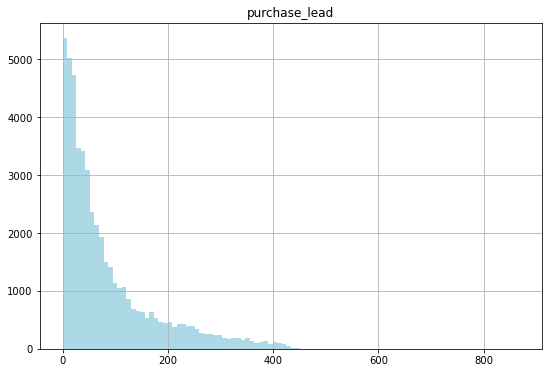

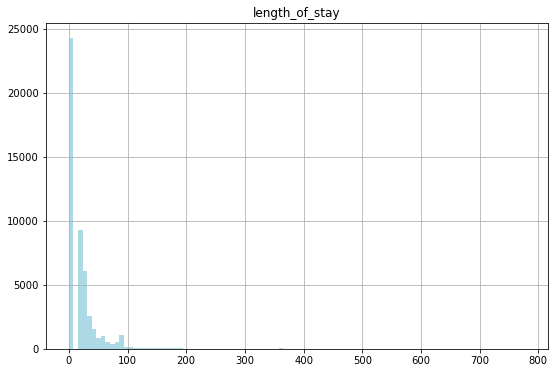

In [21]:
numeric_features = df[["purchase_lead", "length_of_stay"]]

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax, color="lightblue")
    ax.set_title(col)
plt.show()

The number of days between travel date and booking date and number of days spent at destination are both positive skewed. 

#### Bivariate Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


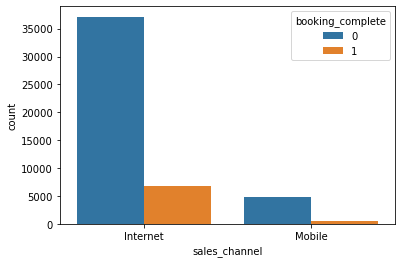

AxesSubplot(0.125,0.125;0.775x0.755)


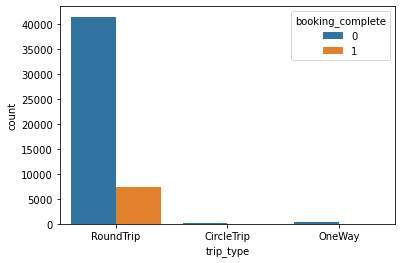

AxesSubplot(0.125,0.125;0.775x0.755)


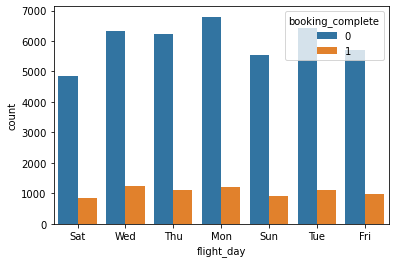

AxesSubplot(0.125,0.125;0.775x0.755)


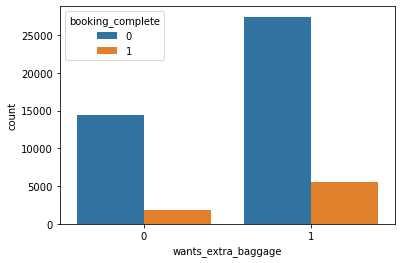

AxesSubplot(0.125,0.125;0.775x0.755)


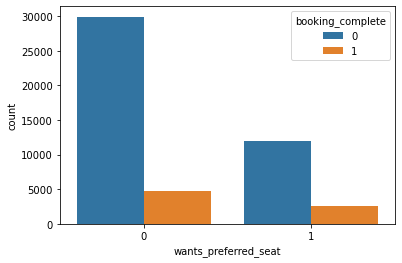

AxesSubplot(0.125,0.125;0.775x0.755)


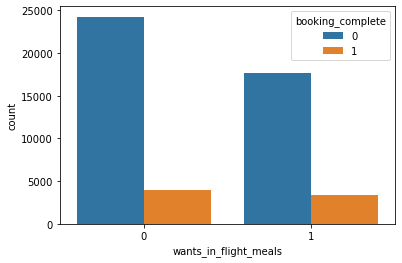

AxesSubplot(0.125,0.125;0.775x0.755)


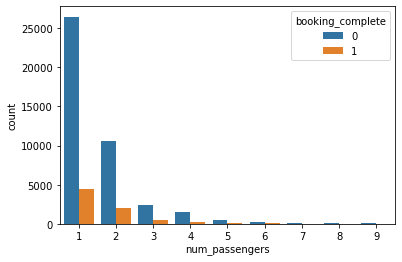

AxesSubplot(0.125,0.125;0.775x0.755)


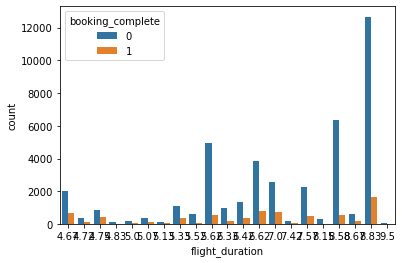

AxesSubplot(0.125,0.125;0.775x0.755)


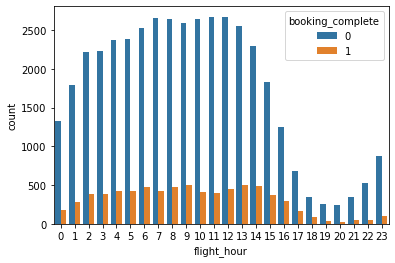

In [23]:
for feature in categorical_features:
    print(sns.countplot(x=feature, data=df, hue='booking_complete'))
    plt.show()

#### Correlation

<AxesSubplot:>

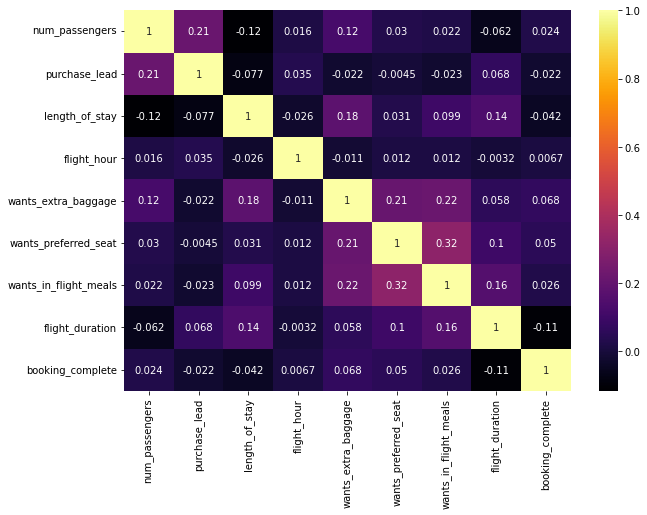

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno')

There is no high correlation between predictors in the dataset, that's good. However, the correlation between independant variables with target variable is also not too high. 

### Data Preprocessing

A predictive model cannot accept categorical or string values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

Another way to encode categorical features is to use dummy variables AKA one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### Data Encoding

In [ ]:
df["flight_day"].unique()

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

#### One Hot Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(handle_unknown='ignore')
nominal_category = ['sales_channel','trip_type','route','booking_origin']
for i in nominal_category:  
    df[i] = encoder.fit_transform(df[i]) 

ValueError: Expected 2D array, got 1D array instead:
array=['Internet' 'Internet' 'Internet' ... 'Internet' 'Internet' 'Internet'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df['sales_channel'].value_counts()

In [ ]:
df['trip_type'].value_counts()

In [ ]:
df['route'].value_counts()

In [ ]:
This variable is high cardinality, so we could not use one hot or dummy encoding.